# Diving into 2021 Realtor Data

## Introduction

### One of the most exciting concepts about real estate is the fact that no matter who you are or where you live, you exsist in the business of real estate in one form or another. In this dataset we are going to take a look at some real estate data from 2021 that was scraped from www.realtor.com that includes over 900K properties. Before we begin here is a little breakdown of the columns and a description to understand them more clearly:

- status (Housing status - a. ready for sale or b. ready to build)
- bed (# of beds)
- bath (# of bathrooms)
- acre_lot (Property / Land size in acres)
- city (city name)
- state (state name)
- zip_code (postal code of the area
- house_size (house area/size/living space in square feet)
- prev_sold_date (Previously sold date)
- price (Housing price, it is either the current listing price or recently sold price if the house is sold recently)

## Limitations

### As far as the limitation go on this dataset, every state is not included within this dataset so we won't be able to compare some concepts from a national standpoint.

## Structure

### As we work through this project, we are going to answer 5 questions.

1. What is the distribution of housing statuses in this dataset (ready for sale or ready to build)?
2.  What states are the dataset comprised of?
3. Can we identify any trends between the number of bedrooms and the price of the property?
4. What are the top five cities with the highest average housing prices?
5. If there are any seasonal trends in property sales, and can you identify the best time to list a property?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
realtor_data=pd.read_csv('realtor_data.csv', sep=',')

## 1. What is the distribution of housing statuses in this dataset (ready for sale or ready to build)?

### With over 900K properties in this dataset, we want to identify which houses are readily available and "for sale" vs the properties that are ready to build which lay in the "ready to build" category. We go on to see that there is an overwhelming number of houses for sale vs those ready to build. There are 903,373 houses for sale vs 1,593 houses ready to build.

In [3]:
sale_vs_build= realtor_data['status'].value_counts()
sale_vs_build

for_sale          903373
ready_to_build      1593
Name: status, dtype: int64

## 2. What states are the dataset comprised of?

### As mentioned in our 'Limitations' section, not every state is represented in our dataset. Well, that leaves the question of "What states are represented in our dataset?". Through our discovery, we find out that there are a total of 18 states represented. New Jersey, New York and Massachusetts are the top 3 with Tennessee, Wyoming and West Virginia being on the lower end of representation as the bottom 3.

In [4]:
states= realtor_data['state'].value_counts(sort=True)
states

New Jersey        231958
New York          197215
Massachusetts     175248
Connecticut        89778
New Hampshire      51394
Vermont            46460
Maine              36650
Rhode Island       29596
Puerto Rico        24679
Pennsylvania       17148
Virgin Islands      2573
Delaware            2135
Georgia               50
Virginia              31
South Carolina        25
Tennessee             20
Wyoming                3
West Virginia          3
Name: state, dtype: int64

## 3. Can we identify any trends between the number of bedrooms and the price of the property?

### In real estate, there is usually a trend in the number of bedrooms and the price of the house. There are variables that can influence that however. In real estate, the saying goes "location, location, location" because it has the biggest impact on prices. We can see a trend develop right up to around that 21 bedrooms. Then it starts to get a little sporatic.

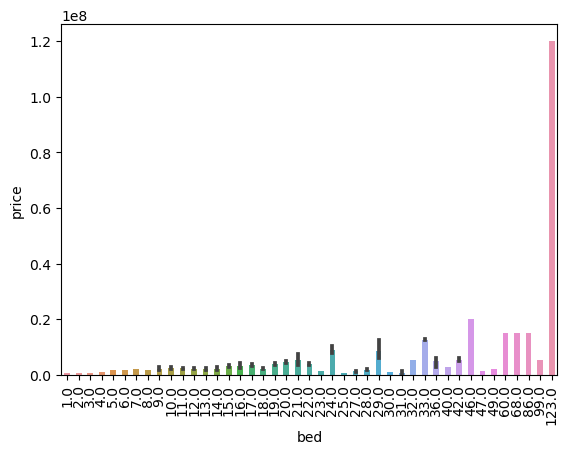

In [54]:
sns.barplot(x="bed", y="price", data=realtor_data, width=.5)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.15)
plt.show()

## 4. What are the top five cities with the highest average housing prices?

### Earlier we saw that we gathered information from 18 states in total. Now we circle around to take a deeper look into the cities of those respective states. The city with the highest is  Waterfront with $12,000,000. Followed by Rochdalle Village, Middletown Township, Woods Hole and Chilmark rounds out the top 5.

In [77]:
city_avg=realtor_data.groupby('city')['price'].mean().sort_values(ascending=False)
city_avg.head(5)

city
Waterfront             1.200000e+07
Rochdale Village       9.800000e+06
Middletown Township    9.200000e+06
Woods Hole             8.583000e+06
Chilmark               7.136333e+06
Name: price, dtype: float64

In [87]:
cities= realtor_data['city'].value_counts(sort=True)
cities

New York City    47502
New York         46432
Boston           31502
Brooklyn         22690
Philadelphia     10416
                 ...  
Mahopac              1
Carmel Hamlet        1
Riverhead            1
Sunset Park          1
North Salem          1
Name: city, Length: 2487, dtype: int64

## 5. Which quarter has yielded the best results for property sales historically?

### Real Estate is a complex business and it never really stops. While houses are listed throughout the entire year, it is no secret that there is an ideal time to list and sale a propery to maximize your profit. Q1 is January thorugh March, Q2 is April through June, Q3 is July through September and Q4 is October through December. Q3 has yielded the most sales since we can only measure that through our 'prev_sold_date' column which would confirm a sell has been documented. Q3 has sold 126,062 properties making it the top producing quarter historically with Q4 coming in second with 113,039. The gap between Q4 and Q3 is 13,023 properties. That 13,023 could be the difference in millions or even billions of dollars if the property slips into Q4.

In [91]:
dates=realtor_data['prev_sold_date'].value_counts()
dates.head(10).sort_values(ascending=False)

2018-07-25    317
2022-01-21    305
2021-12-01    269
2021-12-14    267
2021-10-18    256
2005-08-01    253
2022-02-28    245
2016-08-30    242
2006-09-01    239
2005-07-29    229
Name: prev_sold_date, dtype: int64

In [92]:
realtor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   status          904966 non-null  object        
 1   bed             775126 non-null  float64       
 2   bath            791082 non-null  float64       
 3   acre_lot        638324 non-null  float64       
 4   city            904894 non-null  object        
 5   state           904966 non-null  object        
 6   zip_code        904762 non-null  float64       
 7   house_size      612080 non-null  float64       
 8   prev_sold_date  445865 non-null  datetime64[ns]
 9   price           904895 non-null  float64       
 10  month           445865 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 75.9+ MB


In [93]:
realtor_data['prev_sold_date']= pd.to_datetime(realtor_data['prev_sold_date'])

In [94]:
realtor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   status          904966 non-null  object        
 1   bed             775126 non-null  float64       
 2   bath            791082 non-null  float64       
 3   acre_lot        638324 non-null  float64       
 4   city            904894 non-null  object        
 5   state           904966 non-null  object        
 6   zip_code        904762 non-null  float64       
 7   house_size      612080 non-null  float64       
 8   prev_sold_date  445865 non-null  datetime64[ns]
 9   price           904895 non-null  float64       
 10  month           445865 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 75.9+ MB


In [96]:
realtor_data['month'] = realtor_data['prev_sold_date'].dt.month
realtor_data

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,month
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaT,105000.0,NaN
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaT,80000.0,NaN
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaT,67000.0,NaN
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaT,145000.0,NaN
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaT,65000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
904961,for_sale,2.0,2.0,NaN,New York City,New York,10463.0,NaN,2021-08-13,359000.0,8.0
904962,for_sale,2.0,2.0,NaN,Bronx,New York,10463.0,1200.0,NaT,299000.0,NaN
904963,for_sale,NaN,1.0,NaN,Bronx,New York,10463.0,NaN,NaT,120000.0,NaN
904964,for_sale,3.0,2.0,NaN,Bronx,New York,10463.0,NaN,NaT,449000.0,NaN


In [97]:
realtor_data.isna().sum()

status                 0
bed               129840
bath              113884
acre_lot          266642
city                  72
state                  0
zip_code             204
house_size        292886
prev_sold_date    459101
price                 71
month             459101
dtype: int64

In [98]:
only_prev_sold = realtor_data.loc[realtor_data['prev_sold_date'].notnull()] 
only_prev_sold

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,month
684,for_sale,3.0,2.0,NaN,Canovanas,Puerto Rico,729.0,1200.0,2020-02-28,76900.0,2.0
745,for_sale,3.0,2.0,NaN,Canovanas,Puerto Rico,729.0,1200.0,2020-02-28,76900.0,2.0
802,for_sale,3.0,2.0,NaN,Canovanas,Puerto Rico,729.0,1200.0,2020-02-28,76900.0,2.0
829,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0,6.0
932,for_sale,3.0,2.0,NaN,Canovanas,Puerto Rico,729.0,1200.0,2020-02-28,76900.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
904957,for_sale,1.0,1.0,NaN,Bronx,New York,10463.0,900.0,2014-04-16,219900.0,4.0
904959,for_sale,1.0,1.0,NaN,New York City,New York,10463.0,720.0,2022-04-01,265000.0,4.0
904960,for_sale,2.0,2.0,NaN,New York City,New York,10463.0,1200.0,2021-08-16,399000.0,8.0
904961,for_sale,2.0,2.0,NaN,New York City,New York,10463.0,NaN,2021-08-13,359000.0,8.0


In [99]:
only_prev_sold.isna().sum()

status                 0
bed                26121
bath               16909
acre_lot          122687
city                   0
state                  0
zip_code               0
house_size        133214
prev_sold_date         0
price                  0
month                  0
dtype: int64

In [100]:
only_prev_sold=realtor_data['month'].value_counts()
only_prev_sold.sort_index()

1.0     32967
2.0     28151
3.0     32821
4.0     33784
5.0     36500
6.0     42541
7.0     44028
8.0     43456
9.0     38578
10.0    39881
11.0    34938
12.0    38220
Name: month, dtype: int64

In [58]:
Q1 = 32967 + 28151 + 32821
Q2 = 33784 + 36500 + 42541
Q3 = 44028 + 43456 + 38578
Q4 = 39881 + 34938 + 38220

print('Q1 =', Q1)
print('Q2 =', Q2)
print('Q3 =', Q3, '*MOST*')
print('Q4 =', Q4)

Q1 = 93939
Q2 = 112825
Q3 = 126062 *MOST*
Q4 = 113039


# Summary

## Actions

### Our goal was to dig a little deeper into the data and understand some key questions. We used Python to clean and analyze the data to answer those questions.

## What Else Would I Explore or Contribute To This Data?

### One thing that became aparent while working with the dataset. There is no distinction of if a property is a residential or commercial property. I think that is a huge factor in any real estate conversation. Commercial and residential are two very different worlds in the realm of real estate. To place them in one dataset is fine but there should be a way to identify and seperate the two for an even more in-depth look at our data.